<a href="https://colab.research.google.com/github/samuk1912/Neymar-Messi-Ronaldo-Lewandowski/blob/main/Neymar_Messi_Ronaldo_Lewandowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='green'>Neymar</font>**

In [ ]:
import pandas as pd
import numpy as np
neymar = pd.read_csv('neymar.csv')
neymar.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,Campeonato Paulista,14,3/16/09,Home,Santos FC,Mogi Mirim EC,3:0,LW,73',3:0,Not reported,Not Applicable
1,Copa do Brasil,1.Runde,3/19/09,Home,Santos FC,Rio Branco Football Club (AC),4:0,Not Applicable,59',1:0,Not reported,Not Applicable
2,Campeonato Paulista,16,3/26/09,Home,Santos FC,EC Santo André,3:0,Not Applicable,66',3:0,Not reported,Not Applicable
3,Paulistão A1 - Fase Final,Halbfinale,4/11/09,Home,Santos FC,Sociedade Esportiva Palmeiras,2:1,Not Applicable,46',2:1,Not reported,Not Applicable
4,Série A,7,6/21/09,Home,Santos FC,Clube Atlético Mineiro,2:3,Not Applicable,45',1:0,Left-footed shot,Not Applicable


In [ ]:
neymar = neymar.replace(['Paulistão A1 - Fase Final ', '1.Runde', '2.Runde', '3.Runde', '4.Runde', '5.Runde', '6.Runde', 'Halbfinale', 'Gruppenphase', 'Achtelfinale', 'Finale', 'Viertelfinale'], ['Campeonato Paulista', '1st phase', '2nd phase', '3rd phase', '4th phase', '5th phase', '6th phase','Semifinal', 'Group stage', 'Round of 16', 'Final', 'Quarter finals'])
neymar['Tournament'] = neymar['Tournament'].str.strip()

## Carrer

In [ ]:
goals_neymar = neymar.groupby(['Tournament'])['Venue'].count().rename('gols').sum()
print("Neymar scored", goals_neymar, "goals for clubs in his carrer.")

Neymar scored 363 goals for clubs in his carrer.


## Goals per competition


---


How many goals Neymar scored per competition.

In [ ]:
neymar.groupby(['Tournament'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Tournament,
Ligue 1,82
LaLiga,68
Campeonato Paulista,56
Série A,54
UEFA Champions League,43
Copa del Rey,15
Libertadores,14
Copa do Brasil,13
Coupe de France,8


## Goals per club

In [ ]:
neymar.groupby(['Club'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Club,
Santos FC,139
Paris Saint-Germain,118
FC Barcelona,105
Al-Hilal SFC,1


## Players who assisted Neymar the most

---


The category 'Not applicable', refers to a situation that either Neymar scored by himself, like a penalty or a free-kick or this information is not available.

In [ ]:
neymar.groupby(['Assist'])['Venue'].count().rename('assists').sort_values(ascending=False).head(5)

,assists
Assist,
Not Applicable,165
Lionel Messi,27
Kylian Mbappé,22
Luis Suárez,21
Dani Alves,8


## Clubs who suffered the most with Neymar

In [ ]:
neymar.groupby(['Opponent'])['Venue'].count().rename('goals').sort_values(ascending=False).head(5)

,goals
Opponent,
Guarani Futebol Clube (SP),10
São Paulo Futebol Clube,9
Villarreal CF,9
Athletic Bilbao,8
FC Girondins Bordeaux,8


## Goals per month

<ipython-input-8-b297ec98846b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  neymar['Date'] = pd.to_datetime(neymar['Date'])


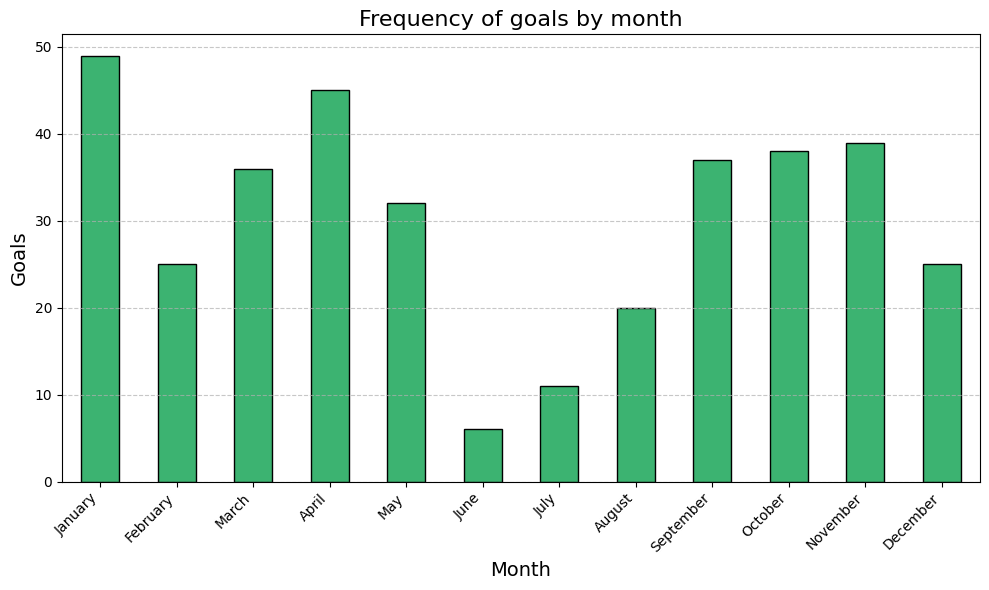

In [ ]:
import datetime
import calendar

neymar['Date'] = pd.to_datetime(neymar['Date'])
neymar['month'] = neymar['Date'].dt.month
goals_month_neymar = neymar.groupby(['month'])['Venue'].count().rename('goals').sort_index()
goals_month_neymar.index = goals_month_neymar.index.map(lambda x: calendar.month_name[x])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
goals_month_neymar.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Frequency of goals by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Goals', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# **<font color='red'>Messi</font>**

In [ ]:
messi = pd.read_csv('messi.csv')
messi.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,2ª B - Grupo III,2,9/5/04,Home,FC Barcelona B,Girona FC,1:2,LW,65',1:2,Left-footed shot,Dani Fernández
1,2ª B - Grupo III,4,9/18/04,Home,FC Barcelona B,RCD Espanyol B,2:0,LW,88',2:0,Left-footed shot,Dani Fernández
2,2ª B - Grupo III,10,10/31/04,Away,FC Barcelona B,Villajoyosa CF,2:1,AM,2',0:1,Not reported,Not Applicable
3,2ª B - Grupo III,14,11/28/04,Away,FC Barcelona B,UE Figueres,2:2,AM,20',0:1,Not reported,Not Applicable
4,2ª B - Grupo III,17,12/19/04,Home,FC Barcelona B,CD Alcoyano,2:0,CF,40',2:0,Left-footed shot,Not Applicable


In [ ]:
messi = messi.replace(['1.Runde', '2.Runde', '3.Runde', '4.Runde', '5.Runde', '6.Runde', 'Halbfinale', 'Gruppenphase', 'Achtelfinale', 'Finale', 'Viertelfinale'], ['1st phase', '2nd phase', '3rd phase', '4th phase', '5th phase', '6th phase','Semifinal', 'Group stage', 'Round of 16', 'Final', 'Quarter finals'])
messi['Tournament'] = messi['Tournament'].str.strip()

## Carrer

In [ ]:
goals_messi = messi.groupby(['Tournament'])['Venue'].count().rename('goals').sum()
print("Messi scored", goals_messi, "goals for clubs in his carrer")

Messi scored 755 goals for clubs in his carrer


## Goals per competition



In [ ]:
messi.groupby(['Tournament'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Tournament,
LaLiga,474
UEFA Champions League,129
Copa del Rey,56
MLS,27
Ligue 1,22
Supercopa,14
Leagues Cup,10
CONCACAF Champions Cup,7
2ª B - Grupo III,6


## Gols per club

In [ ]:
messi.groupby(['Club'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Club,
FC Barcelona,672
Inter Miami CF,45
Paris Saint-Germain,32
FC Barcelona B,6


## Players who assisted Messi the most




In [ ]:
messi.groupby(['Assist'])['Venue'].count().rename('assists').sort_values(ascending=False).head(5)

,assists
Assist,
Not Applicable,231
Luis Suárez,57
Dani Alves,42
Andrés Iniesta,39
Xavi,33


## Clubs that suffered the most with Messi

In [ ]:
messi.groupby(['Opponent'])['Venue'].count().rename('goals').sort_values(ascending=False).head(5)

,goals
Opponent,
Sevilla FC,38
Atlético de Madrid,32
Valencia CF,31
Athletic Bilbao,29
Real Betis Balompié,26


## Goals per month

<ipython-input-16-bb73ae14f0fd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  messi['Date'] = pd.to_datetime(messi['Date'])


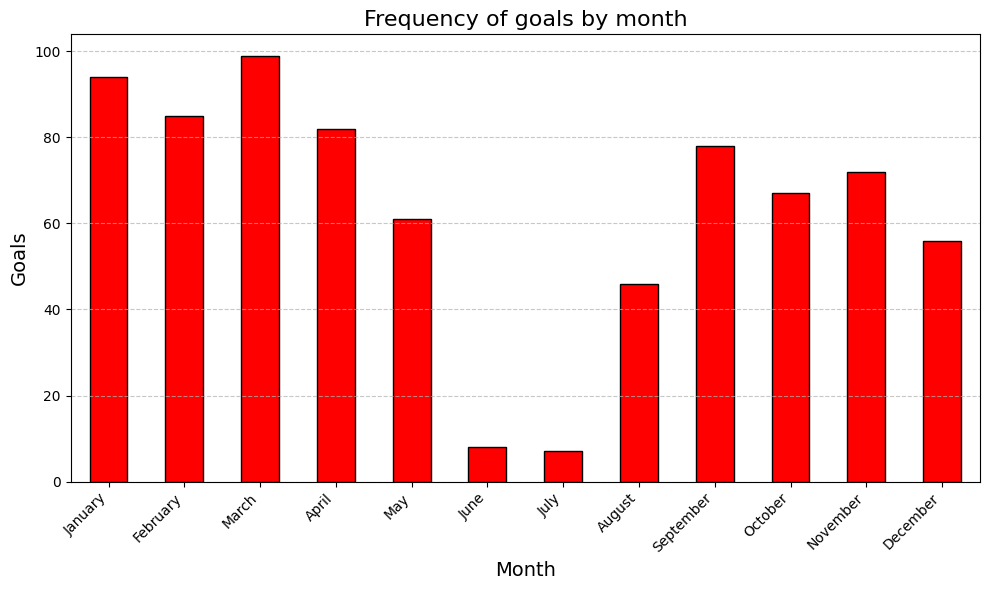

In [ ]:
messi['Date'] = pd.to_datetime(messi['Date'])
messi['month'] = messi['Date'].dt.month
goals_month_messi = messi.groupby(['month'])['Venue'].count().rename('goals').sort_index()
goals_month_messi.index = goals_month_messi.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
goals_month_messi.plot(kind='bar', color='r', edgecolor='black')

plt.title('Frequency of goals by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Goals', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# **<font color='gray'>Cristiano Ronaldo</font>**

In [ ]:
cr7 = pd.read_csv('ronaldo.csv')
cr7.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,Liga Portugal,6,10/7/02,Home,Sporting CP,Moreirense FC,3:0,LW,34',2:0,Solo run,Not Applicable
1,Liga Portugal,6,10/7/02,Home,Sporting CP,Moreirense FC,3:0,LW,90'+5,3:0,Header,Rui Jorge
2,Liga Portugal,8,10/26/02,Away,Sporting CP,Boavista FC,1:2,Not Applicable,88',1:2,Right-footed shot,Carlos Martins
3,Taça de Portugal,4.Runde,11/24/02,Home,Sporting CP,CD Estarreja,4:1,LW,67',3:1,Left-footed shot,César Prates
4,Taça de Portugal,5.Runde,12/18/02,Home,Sporting CP,FC Oliveira do Hospital,8:1,SS,13',3:0,Left-footed shot,Ricardo Fernandes


In [ ]:
cr7 = cr7.replace(['1.Runde', '2.Runde', '3.Runde', '4.Runde', '5.Runde', '6.Runde', 'Halbfinale', 'Gruppenphase', 'Achtelfinale', 'Finale', 'Viertelfinale'], ['1st phase', '2nd phase', '3rd phase', '4th phase', '5th phase', '6th phase','Semifinal', 'Group stage', 'Round of 16', 'Final', 'Quarter finals'])
cr7['Tournament'] = cr7['Tournament'].str.strip()

## Carrer

In [ ]:
gols_cr7 = cr7.groupby(['Tournament'])['Venue'].count().rename('gols').sum()
print("Cristiano Ronaldo scored", gols_cr7, "goals for clubs in his carrer")

Cristiano Ronaldo scored 793 goals for clubs in his carrer


## Goals per competition

In [ ]:
cr7.groupby(['Tournament'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Tournament,
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Saudi Pro League,73
Copa del Rey,22
FA Cup,13
AFC Champions League Elite,8
Club World Cup,7


## Goals per club

In [ ]:
cr7.groupby(['Club'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Club,
Real Madrid,450
Manchester United,145
Juventus FC,101
Al-Nassr FC,92
Sporting CP,5


## Players who assisted Cristiano Ronaldo the most

In [ ]:
cr7.groupby(['Assist'])['Venue'].count().rename('assists').sort_values(ascending=False).head(5)

,assists
Assist,
Not Applicable,286
Karim Benzema,43
Gareth Bale,29
Mesut Özil,27
Marcelo,23


## Clubs who suffered the most with Cristiano Ronaldo

In [ ]:
cr7.groupby(['Opponent'])['Venue'].count().rename('goals').sort_values(ascending=False).head(5)

,goals
Opponent,
Sevilla FC,27
Atlético de Madrid,25
Getafe CF,23
FC Barcelona,20
Celta de Vigo,20


## Goals per month

<ipython-input-24-aeebea5f8175>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cr7['Date'] = pd.to_datetime(cr7['Date'])


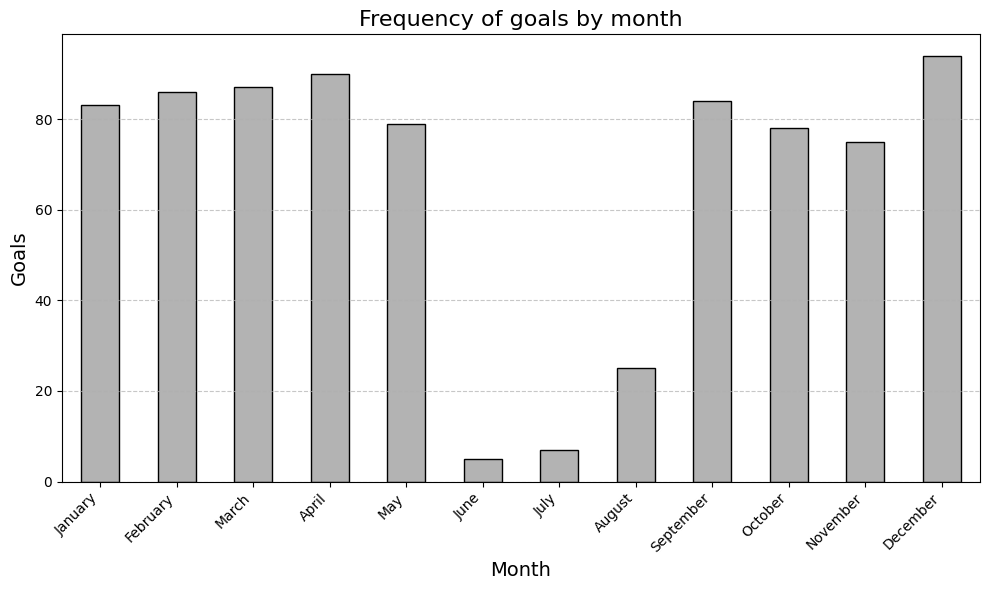

In [ ]:
cr7['Date'] = pd.to_datetime(cr7['Date'])
cr7['month'] = cr7['Date'].dt.month
goals_month_cr7 = cr7.groupby(['month'])['Venue'].count().rename('goals').sort_index()
goals_month_cr7.index = goals_month_cr7.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
goals_month_cr7.plot(kind='bar', color='0.7', edgecolor='black')

plt.title('Frequency of goals by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Goals', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# **<font color='yellow'>Lewandowski</font>**



In [ ]:
lewa = pd.read_csv('lewandowski.csv')
lewa.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,Betclic 1 Liga,1,7/29/07,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90',0:2,Not reported,Not Applicable
1,Betclic 1 Liga,2,8/5/07,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77',4:0,Not reported,Not Applicable
2,Betclic 1 Liga,3,8/8/07,Away,Znicz Pruszkow,GKS Katowice,1:2,Not Applicable,16',0:1,Not reported,Not Applicable
3,Betclic 1 Liga,4,8/11/07,Away,Znicz Pruszkow,LKS Lomza,2:4,Not Applicable,41',2:2,Penalty,Not Applicable
4,Betclic 1 Liga,11,9/19/07,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,Not Applicable,7',1:0,Not reported,Not Applicable


In [ ]:
lewa = lewa.replace(['1.Runde', '2.Runde', '3.Runde', '4.Runde', '5.Runde', '6.Runde', 'Halbfinale', 'Gruppenphase', 'Achtelfinale', 'Finale', 'Viertelfinale'], ['1st phase', '2nd phase', '3rd phase', '4th phase', '5th phase', '6th phase','Semifinal', 'Group stage', 'Round of 16', 'Final', 'Quarter finals'])
lewa['Tournament'] = lewa['Tournament'].str.strip()

## Carrer

In [ ]:
gols_lewa = lewa.value_counts().sum()
print("Lewandowski", gols_lewa, "goals for clubs in his carrer")

Lewandowski 610 goals for clubs in his carrer


## Goals per competition

In [ ]:
lewa.groupby(['Tournament'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Tournament,
Bundesliga,312
UEFA Champions League,105
LaLiga,69
DFB-Pokal,39
Ekstraklasa,32
Betclic 1 Liga,21
DFL-Supercup,7
Copa del Rey,7
Supercopa,5


## Goals per club

In [ ]:
lewa.groupby(['Club'])['Venue'].count().rename('goals').sort_values(ascending=False)

,goals
Club,
Bayern Munich,344
Borussia Dortmund,103
FC Barcelona,101
Lech Poznan,41
Znicz Pruszkow,21


## Players who assisted Lewandowski the most

In [ ]:
lewa.groupby(['Assist'])['Venue'].count().rename('assists').sort_values(ascending=False).head(5)

,assists
Assist,
Not Applicable,149
Thomas Müller,60
Joshua Kimmich,27
Mario Götze,18
Kingsley Coman,17


## Clubs that suffered the most with Lewa

In [ ]:
lewa.groupby(['Opponent'])['Venue'].count().rename('goals').sort_values(ascending=False).head(5)

,goals
Opponent,
Borussia Dortmund,29
VfL Wolfsburg,26
FC Augsburg,23
FC Schalke 04,21
1.FSV Mainz 05,20


## Goals per month

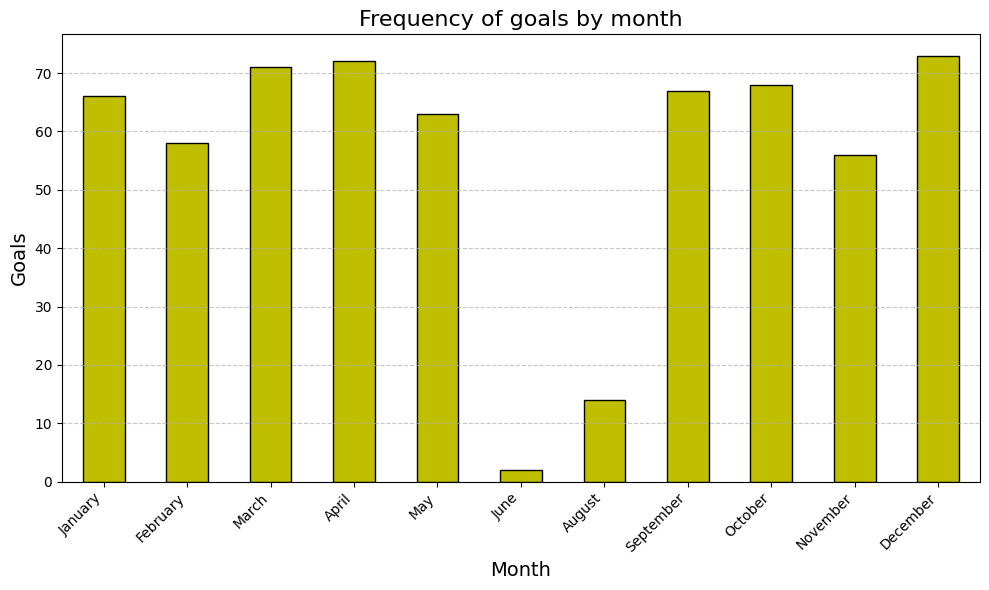

In [ ]:
lewa['Date'] = pd.to_datetime(cr7['Date'])
lewa['month'] = lewa['Date'].dt.month
goals_month_lewa = lewa.groupby(['month'])['Venue'].count().rename('goals').sort_index()
goals_month_lewa.index = goals_month_lewa.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
goals_month_lewa.plot(kind='bar', color='y', edgecolor='black')

plt.title('Frequency of goals by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Goals', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Comparing their carrers

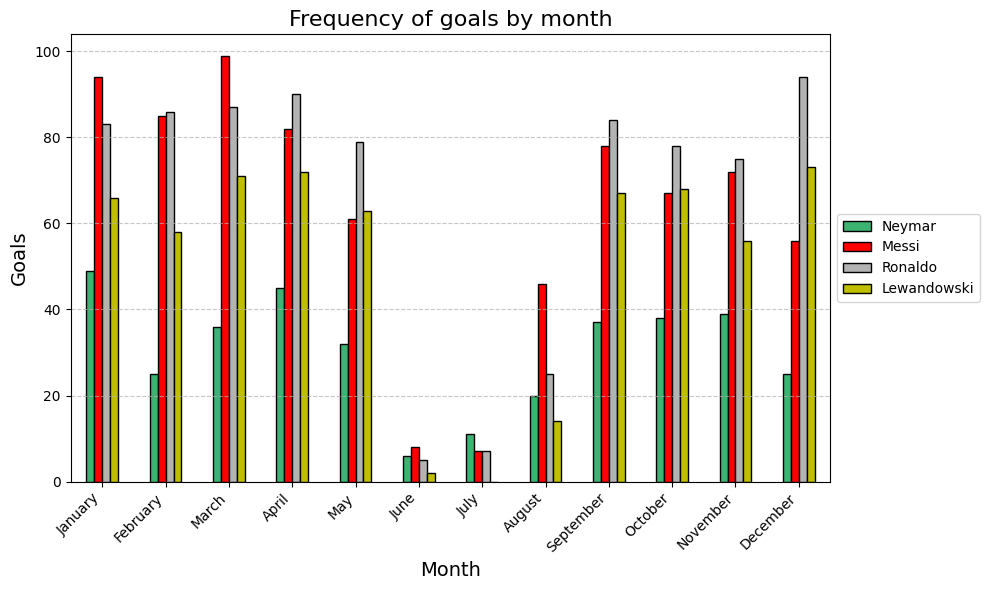

In [ ]:
goals = pd.DataFrame()
goals['Neymar'] = goals_month_neymar
goals['Messi'] = goals_month_messi
goals['Ronaldo'] = goals_month_cr7
goals['Lewandowski'] = goals_month_lewa

goals.plot(kind='bar', color=['mediumseagreen', 'r', '0.7', 'y'], edgecolor='black', figsize=(10, 6))

plt.title('Frequency of goals by month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

## Competitions in common



In [ ]:
competition_neymar = set(neymar['Tournament'].unique())
competition_messi = set(messi['Tournament'].unique())
competition_cr7 = set(cr7['Tournament'].unique())
competition_lewa = set(lewa['Tournament'].unique())

competition_common = list(competition_neymar.intersection(competition_messi).intersection(competition_cr7))

neymar_common = neymar[neymar['Tournament'].isin(competition_common)]
messi_common = messi[messi['Tournament'].isin(competition_common)]
cr7_common = cr7[cr7['Tournament'].isin(competition_common)]
lewa_common = lewa[lewa['Tournament'].isin(competition_common)]

goals_neymar_common = neymar_common.groupby(['Tournament'])['Venue'].count().rename('Neymar')
goals_messi_common = messi_common.groupby(['Tournament'])['Venue'].count().rename('Messi')
goals_cr7_common = cr7_common.groupby(['Tournament'])['Venue'].count().rename('Ronaldo')
goals_lewa_common = lewa_common.groupby(['Tournament'])['Venue'].count().rename('Lewandowski')

goals_common = pd.concat([goals_neymar_common, goals_messi_common, goals_cr7_common, goals_lewa_common], axis=1).fillna(0).astype(int)
goals_common.index.name = 'Tournament'
gols_common = goals_common.sort_values(by=['Neymar', 'Messi', 'Ronaldo', 'Lewandowski'], ascending=False)

goals_common

,Neymar,Messi,Ronaldo,Lewandowski
Tournament,,,,
Club World Cup,1,5,7,2
Copa del Rey,15,56,22,7
LaLiga,68,474,311,69
Supercopa,1,14,4,5
UEFA Champions League,43,129,140,105


In [ ]:
neymar['Player'] = 'Neymar'
messi['Player'] = 'Messi'
cr7['Player'] = 'Ronaldo'
lewa['Player'] = 'Lewandowski'

complete = pd.concat([neymar, messi, cr7, lewa], ignore_index=True)

## It is necessary to transform the 'Minutes' column into integers, for example, "90'+1" becomes 91, where type(91) = int, "45'+1" becomes 46 and so on.

In [ ]:
neymar['Minute'].unique()

array(["73'", "59'", "66'", "46'", "45'", "88'", "72'", "67'", "58'",
       "89'", "63'", "64'", "70'", "20'", "78'", "86'", "90'+2", "24'",
       "38'", "33'", "28'", "54'", "30'", "21'", "81'", "2'", "29'",
       "84'", "7'", "32'", "44'", "14'", "55'", "68'", "1'", "27'",
       "90'+1", "17'", "75'", "79'", "82'", "41'", "50'", "49'", "52'",
       "4'", "83'", "11'", "45'+2", "47'", "26'", "51'", "13'", "3'",
       "15'", "48'", "56'", "31'", "19'", "76'", "77'", "65'", "42'",
       "87'", "71'", "90'", "36'", "8'", "62'", "12'", "23'", "39'",
       "53'", "85'", "5'", "6'", "34'", "69'", "9'", "18'", "90'+4",
       "37'", "90'+7", "80'", "74'", "22'", "60'", "25'", "120'+3", "40'",
       "45'+4", "43'", "57'", "10'", "45'+6", "45'+5", "35'"],
      dtype=object)

In [ ]:
def cleaning_minutes(minutes):
  if pd.isna(minutes):
    return np.nan
  minutes = str(minutes).replace("'", "")
  if '+' in minutes:
    minutes = minutes.split('+')
    return int(minutes[0]) + int(minutes[1])
  try:
    return int(minutes)
  except ValueError:
    return np.nan

In [ ]:
complete['Minute*'] = complete['Minute'].apply(cleaning_minutes)
complete.dropna(subset=['Minute*'], inplace=True) # Remove rows where minute couldn't be parsed
complete['Minute*'] = complete['Minute*'].astype(int)

complete

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,month,Player,Minute*
0,Campeonato Paulista,14,2009-03-16,Home,Santos FC,Mogi Mirim EC,3:0,LW,73',3:0,Not reported,Not Applicable,3,Neymar,73
1,Copa do Brasil,1st phase,2009-03-19,Home,Santos FC,Rio Branco Football Club (AC),4:0,Not Applicable,59',1:0,Not reported,Not Applicable,3,Neymar,59
2,Campeonato Paulista,16,2009-03-26,Home,Santos FC,EC Santo André,3:0,Not Applicable,66',3:0,Not reported,Not Applicable,3,Neymar,66
3,Campeonato Paulista,Semifinal,2009-04-11,Home,Santos FC,Sociedade Esportiva Palmeiras,2:1,Not Applicable,46',2:1,Not reported,Not Applicable,4,Neymar,46
4,Série A,7,2009-06-21,Home,Santos FC,Clube Atlético Mineiro,2:3,Not Applicable,45',1:0,Left-footed shot,Not Applicable,6,Neymar,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,LaLiga,29,2019-10-19,Home,FC Barcelona,Girona FC,4:1,CF,77',3:1,Counter attack goal,Frenkie de Jong,10,Lewandowski,77
2517,UEFA Champions League,Quarter finals,2019-10-30,Home,FC Barcelona,Borussia Dortmund,4:0,CF,48',2:0,Header,Raphinha,10,Lewandowski,48
2518,UEFA Champions League,Quarter finals,2019-12-01,Home,FC Barcelona,Borussia Dortmund,4:0,CF,66',3:0,Counter attack goal,Fermín López,12,Lewandowski,66
2519,LaLiga,38,2019-12-07,Away,FC Barcelona,Athletic Bilbao,0:3,CF,14',0:1,Right-footed shot,Fermín López,12,Lewandowski,14


## Separating the score to understand the gol's impact on the game.

In [ ]:
def separating_score(score):
  if pd.isna(score) or ":" not in score:
    return np.nan, np.nan
  # Getting the score befor the goal
  try:
    player_score_before_goal, opponent_score_before_goal = map(int, score.split(':'))
    player_score_before_goal = player_score_before_goal - 1
    return int(player_score_before_goal), int(opponent_score_before_goal)
  except ValueError:
    return np.nan, np.nan

complete[['Player_score_before_goal', 'Opponent_score_before_goal']] = complete['When Scored'].apply(
    lambda x: pd.Series(separating_score(x))
)

complete

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,month,Player,Minute*,Player_score_before_goal,Opponent_score_before_goal
0,Campeonato Paulista,14,2009-03-16,Home,Santos FC,Mogi Mirim EC,3:0,LW,73',3:0,Not reported,Not Applicable,3,Neymar,73,2,0
1,Copa do Brasil,1st phase,2009-03-19,Home,Santos FC,Rio Branco Football Club (AC),4:0,Not Applicable,59',1:0,Not reported,Not Applicable,3,Neymar,59,0,0
2,Campeonato Paulista,16,2009-03-26,Home,Santos FC,EC Santo André,3:0,Not Applicable,66',3:0,Not reported,Not Applicable,3,Neymar,66,2,0
3,Campeonato Paulista,Semifinal,2009-04-11,Home,Santos FC,Sociedade Esportiva Palmeiras,2:1,Not Applicable,46',2:1,Not reported,Not Applicable,4,Neymar,46,1,1
4,Série A,7,2009-06-21,Home,Santos FC,Clube Atlético Mineiro,2:3,Not Applicable,45',1:0,Left-footed shot,Not Applicable,6,Neymar,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,LaLiga,29,2019-10-19,Home,FC Barcelona,Girona FC,4:1,CF,77',3:1,Counter attack goal,Frenkie de Jong,10,Lewandowski,77,2,1
2517,UEFA Champions League,Quarter finals,2019-10-30,Home,FC Barcelona,Borussia Dortmund,4:0,CF,48',2:0,Header,Raphinha,10,Lewandowski,48,1,0
2518,UEFA Champions League,Quarter finals,2019-12-01,Home,FC Barcelona,Borussia Dortmund,4:0,CF,66',3:0,Counter attack goal,Fermín López,12,Lewandowski,66,2,0
2519,LaLiga,38,2019-12-07,Away,FC Barcelona,Athletic Bilbao,0:3,CF,14',0:1,Right-footed shot,Fermín López,12,Lewandowski,14,-1,1


## Classifying the goals


---

If the goal made the tied the match, 'Equalizer', if the goal just reduced the difference between the scores, 'Reducing Deficit', if the goal untied the match, 'Go-ahead goal' and if the team was already wining, 'Extending Lead'

In [ ]:
def classifying_goals(row):
  player_score_before_goal = row['Player_score_before_goal']
  opponent_score_before_goal = row['Opponent_score_before_goal']

  if pd.isna(player_score_before_goal) or pd.isna(opponent_score_before_goal):
    return 'Unkown'

  if player_score_before_goal < opponent_score_before_goal: # Team was losing
    if player_score_before_goal + 1 == opponent_score_before_goal:
      return 'Equalizer (was losing)'
    else: # player_score_before + 1 < opponent_score_before
      return 'Reducing Deficit'
  elif player_score_before_goal == opponent_score_before_goal: # Team was drawing
    return 'Go-ahead Goal'
  else: # Team was winning (player_score_before > opponent_score_before)
    return 'Extending Lead'

complete['Goal_Impact'] = complete.apply(classifying_goals, axis=1)
complete

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,month,Player,Minute*,Player_score_before_goal,Opponent_score_before_goal,Goal_Impact
0,Campeonato Paulista,14,2009-03-16,Home,Santos FC,Mogi Mirim EC,3:0,LW,73',3:0,Not reported,Not Applicable,3,Neymar,73,2,0,Extending Lead
1,Copa do Brasil,1st phase,2009-03-19,Home,Santos FC,Rio Branco Football Club (AC),4:0,Not Applicable,59',1:0,Not reported,Not Applicable,3,Neymar,59,0,0,Go-ahead Goal
2,Campeonato Paulista,16,2009-03-26,Home,Santos FC,EC Santo André,3:0,Not Applicable,66',3:0,Not reported,Not Applicable,3,Neymar,66,2,0,Extending Lead
3,Campeonato Paulista,Semifinal,2009-04-11,Home,Santos FC,Sociedade Esportiva Palmeiras,2:1,Not Applicable,46',2:1,Not reported,Not Applicable,4,Neymar,46,1,1,Go-ahead Goal
4,Série A,7,2009-06-21,Home,Santos FC,Clube Atlético Mineiro,2:3,Not Applicable,45',1:0,Left-footed shot,Not Applicable,6,Neymar,45,0,0,Go-ahead Goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,LaLiga,29,2019-10-19,Home,FC Barcelona,Girona FC,4:1,CF,77',3:1,Counter attack goal,Frenkie de Jong,10,Lewandowski,77,2,1,Extending Lead
2517,UEFA Champions League,Quarter finals,2019-10-30,Home,FC Barcelona,Borussia Dortmund,4:0,CF,48',2:0,Header,Raphinha,10,Lewandowski,48,1,0,Extending Lead
2518,UEFA Champions League,Quarter finals,2019-12-01,Home,FC Barcelona,Borussia Dortmund,4:0,CF,66',3:0,Counter attack goal,Fermín López,12,Lewandowski,66,2,0,Extending Lead
2519,LaLiga,38,2019-12-07,Away,FC Barcelona,Athletic Bilbao,0:3,CF,14',0:1,Right-footed shot,Fermín López,12,Lewandowski,14,-1,1,Reducing Deficit


## Checking if the team won, lost or drew the match that he scored

In [ ]:
def checking_result(result):
  if pd.isna(result) or ":" not in result:
    return "Unkown"
  player_score, opponent_score = map(int, result.split(':'))
  if player_score > opponent_score:
    return "Won"
  elif player_score < opponent_score:
    return "Lost"
  else:
    return "Draw"

complete['Match_Outcome'] = complete['Result'].apply(checking_result)
complete


,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,month,Player,Minute*,Player_score_before_goal,Opponent_score_before_goal,Goal_Impact,Match_Outcome
0,Campeonato Paulista,14,2009-03-16,Home,Santos FC,Mogi Mirim EC,3:0,LW,73',3:0,Not reported,Not Applicable,3,Neymar,73,2,0,Extending Lead,Won
1,Copa do Brasil,1st phase,2009-03-19,Home,Santos FC,Rio Branco Football Club (AC),4:0,Not Applicable,59',1:0,Not reported,Not Applicable,3,Neymar,59,0,0,Go-ahead Goal,Won
2,Campeonato Paulista,16,2009-03-26,Home,Santos FC,EC Santo André,3:0,Not Applicable,66',3:0,Not reported,Not Applicable,3,Neymar,66,2,0,Extending Lead,Won
3,Campeonato Paulista,Semifinal,2009-04-11,Home,Santos FC,Sociedade Esportiva Palmeiras,2:1,Not Applicable,46',2:1,Not reported,Not Applicable,4,Neymar,46,1,1,Go-ahead Goal,Won
4,Série A,7,2009-06-21,Home,Santos FC,Clube Atlético Mineiro,2:3,Not Applicable,45',1:0,Left-footed shot,Not Applicable,6,Neymar,45,0,0,Go-ahead Goal,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,LaLiga,29,2019-10-19,Home,FC Barcelona,Girona FC,4:1,CF,77',3:1,Counter attack goal,Frenkie de Jong,10,Lewandowski,77,2,1,Extending Lead,Won
2517,UEFA Champions League,Quarter finals,2019-10-30,Home,FC Barcelona,Borussia Dortmund,4:0,CF,48',2:0,Header,Raphinha,10,Lewandowski,48,1,0,Extending Lead,Won
2518,UEFA Champions League,Quarter finals,2019-12-01,Home,FC Barcelona,Borussia Dortmund,4:0,CF,66',3:0,Counter attack goal,Fermín López,12,Lewandowski,66,2,0,Extending Lead,Won
2519,LaLiga,38,2019-12-07,Away,FC Barcelona,Athletic Bilbao,0:3,CF,14',0:1,Right-footed shot,Fermín López,12,Lewandowski,14,-1,1,Reducing Deficit,Lost


## Distribution of Goals per Minute of the Match


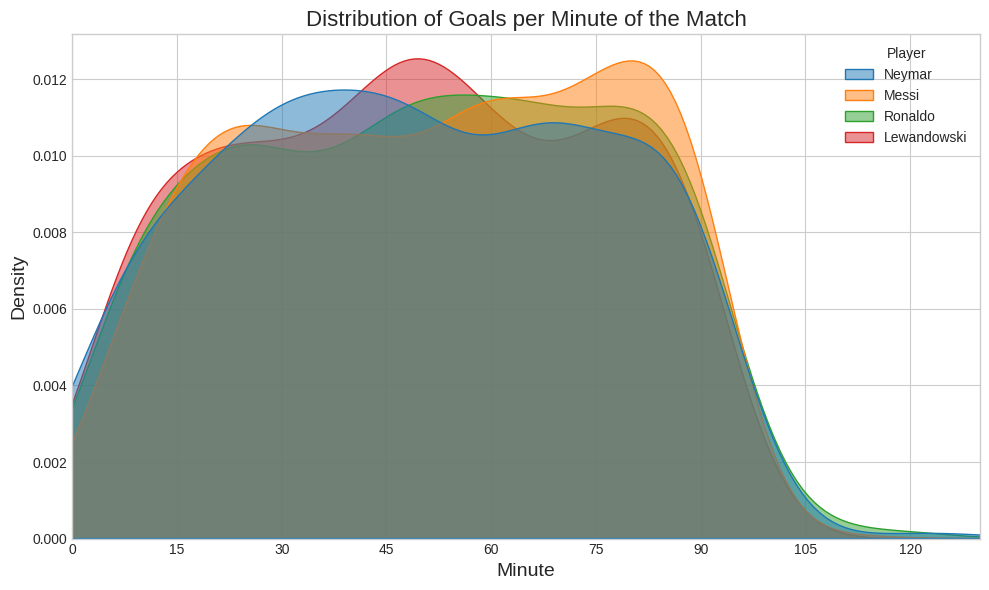

In [ ]:
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Goal Minute Distribution ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=complete, x='Minute*', hue='Player', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Goals per Minute of the Match', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0, 130) # Adjusted for potential extra time values beyond 90+5
plt.xticks(range(0, 131, 15))
plt.tight_layout()
plt.show()


## Goal impact

In [ ]:
impact = complete.groupby(['Player', 'Goal_Impact'])['Venue'].count().rename('goals')

percentage_impact = (((impact / impact.groupby(level=0).transform('sum')) * 100).round(2)).rename('%')

pd.concat([impact, percentage_impact], axis=1)

goals      %
Player      Goal_Impact                         
Lewandowski Equalizer (was losing)     52   8.52
            Extending Lead            184  30.16
            Go-ahead Goal             127  20.82
            Reducing Deficit          247  40.49
Messi       Equalizer (was losing)     73   9.67
            Extending Lead            261  34.57
            Go-ahead Goal             156  20.66
            Reducing Deficit          265  35.10
Neymar      Equalizer (was losing)     36   9.92
            Extending Lead            121  33.33
            Go-ahead Goal              88  24.24
            Reducing Deficit          118  32.51
Ronaldo     Equalizer (was losing)     79   9.96
            Extending Lead            233  29.38
            Go-ahead Goal             182  22.95
            Reducing Deficit          299  37.70

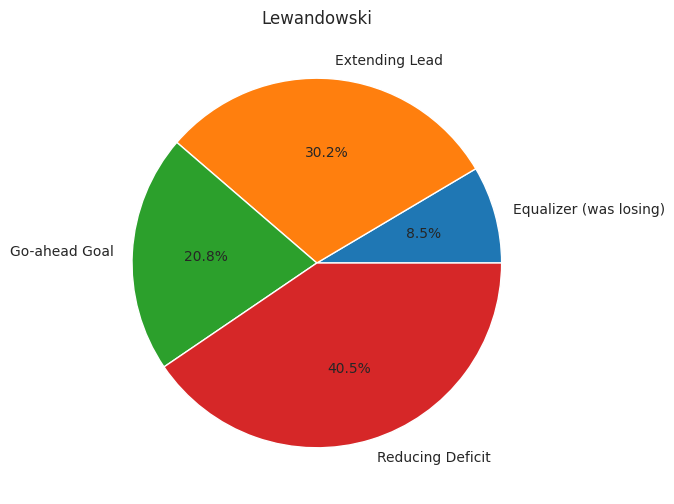

In [ ]:
percentage_impact = percentage_impact.reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.pie(percentage_impact[percentage_impact['Player']=='Lewandowski']['%'], labels=percentage_impact[percentage_impact['Player']=='Lewandowski']['Goal_Impact'], autopct='%1.1f%%')
plt.title('Lewandowski')
plt.show()

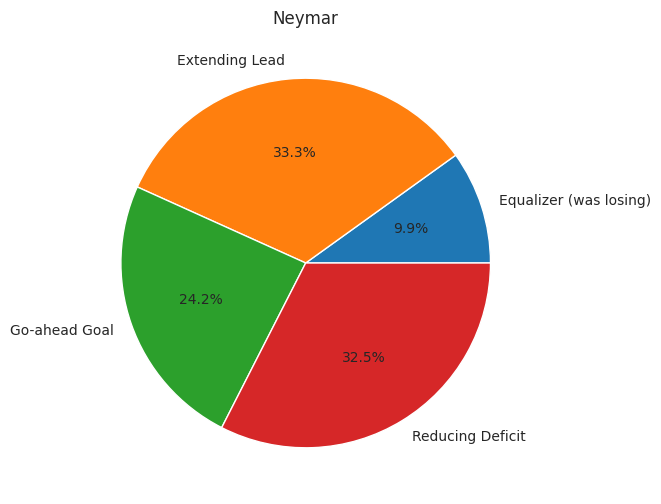

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.pie(percentage_impact[percentage_impact['Player']=='Neymar']['%'], labels=percentage_impact[percentage_impact['Player']=='Neymar']['Goal_Impact'], autopct='%1.1f%%')
plt.title('Neymar')
plt.show()

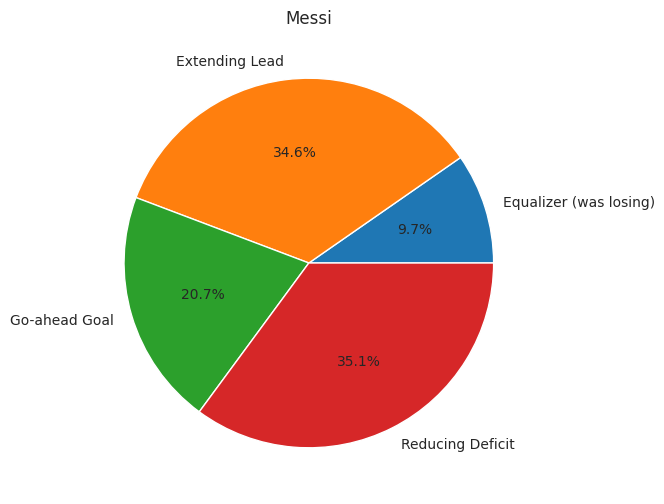

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.pie(percentage_impact[percentage_impact['Player']=='Messi']['%'], labels=percentage_impact[percentage_impact['Player']=='Messi']['Goal_Impact'], autopct='%1.1f%%')
plt.title('Messi')
plt.show()

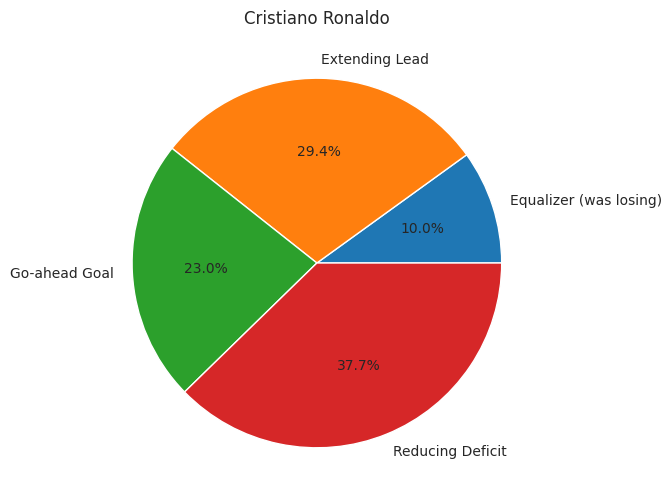

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.pie(percentage_impact[percentage_impact['Player']=='Ronaldo']['%'], labels=percentage_impact[percentage_impact['Player']=='Ronaldo']['Goal_Impact'], autopct='%1.1f%%')
plt.title('Cristiano Ronaldo')
plt.show()

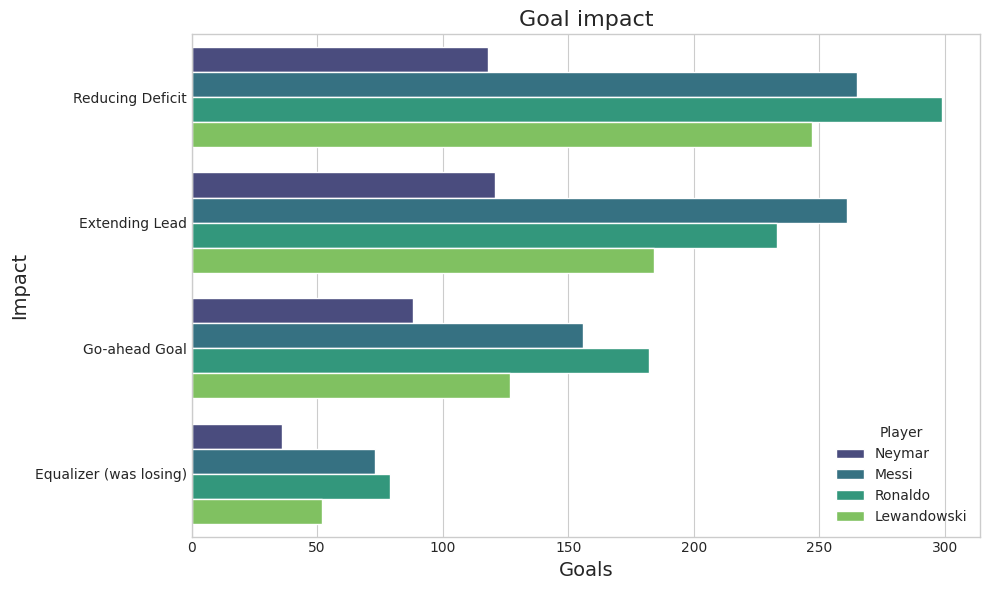

In [ ]:
goal_impact_order = ['Go-ahead Goal', 'Equalizer (was losing)', 'Extending Lead', 'Reducing Deficit', 'Unknown']
plt.figure(figsize=(10, 6))
sns.countplot(data=complete, y='Goal_Impact', hue='Player', order=complete['Goal_Impact'].value_counts().index, palette='viridis')
plt.title('Goal impact', fontsize=16)
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Impact', fontsize=14)
plt.tight_layout()
plt.show()

## Match outcome

In [ ]:
complete.groupby(['Player', 'Match_Outcome'])['Venue'].count().rename('goals')

Player       Match_Outcome
Lewandowski  Draw              39
             Lost             248
             Won              323
Messi        Draw              65
             Lost             270
             Won              420
Neymar       Draw              29
             Lost             123
             Won              211
Ronaldo      Draw              53
             Lost             300
             Won              440
Name: goals, dtype: int64

What does this numbers mean? It means that, Neymar scored 211 goals in matches that his team won. When we talk about percentages it's easier to understand.

In [ ]:
percentage_outcome = complete.groupby('Player')['Match_Outcome'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
percentage_outcome

Match_Outcome,Draw,Lost,Won
Player,,,
Lewandowski,6.39,40.66,52.95
Messi,8.61,35.76,55.63
Neymar,7.99,33.88,58.13
Ronaldo,6.68,37.83,55.49


Ronaldo scored 55.49% of his goals in won matches, a similar figure to Messi (55.63%) and Neymar (58.13%), indicating the strong contribution of the three stars in decisive moments.

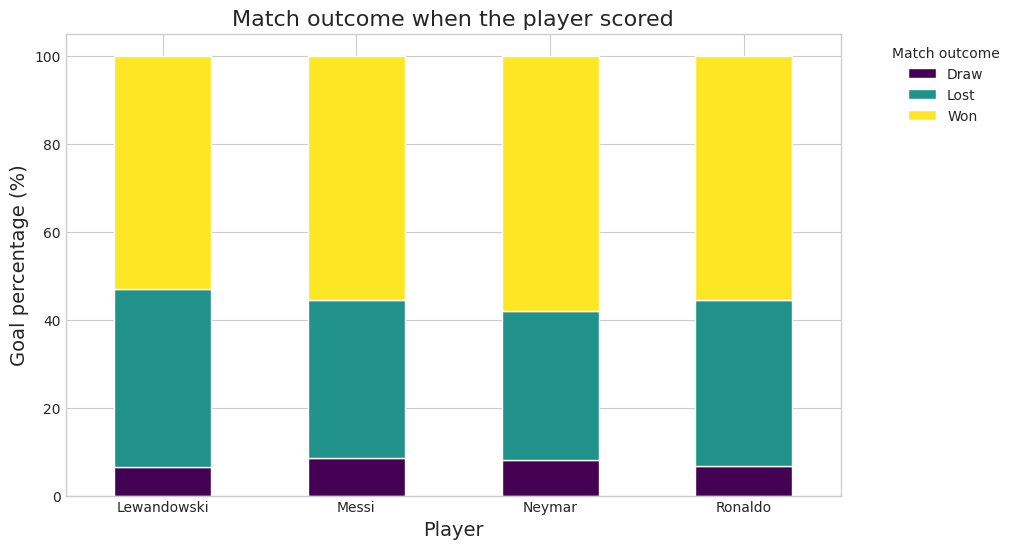

In [ ]:
percentage_outcome.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Match outcome when the player scored', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Goal percentage (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Match outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Goals in knockout-stages

In [ ]:
knockout = ['1st phase', '2nd phase', '3rd phase', '4th phase', '5th phase', '6th phase','Round of 16', 'Quarter finals','Semifinal', 'Final']

memory = {'goals': [neymar[neymar['Matchday'].isin(knockout)].shape[0],
                    messi[messi['Matchday'].isin(knockout)].shape[0],
                    cr7[cr7['Matchday'].isin(knockout)].shape[0],
                    lewa[lewa['Matchday'].isin(knockout)].shape[0]]}

goals_knockout = pd.DataFrame(
    data = memory,
    index=['Neymar', 'Messi', 'Ronaldo', 'Lewandowski']
)

goals_knockout


,goals
Neymar,80
Messi,143
Ronaldo,138
Lewandowski,103


<Figure size 1000x600 with 0 Axes>

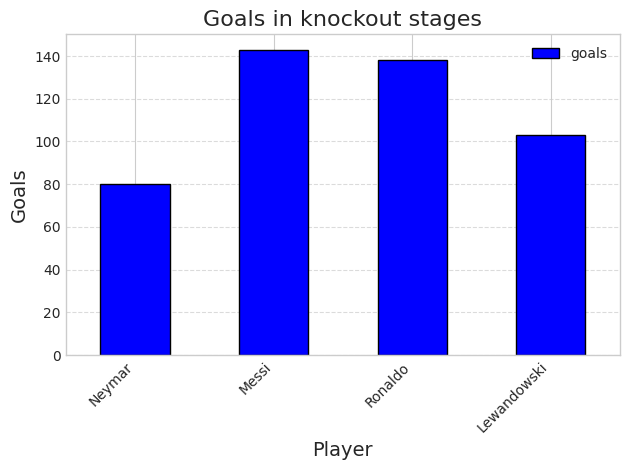

In [ ]:
plt.figure(figsize=(10, 6))
goals_knockout.plot(kind='bar', color='b', edgecolor='black')

plt.title('Goals in knockout stages', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Goals', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()